# **Submitted By: Muhammad Shayan Haider**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("Final_data.csv")

# **Step 1: Pre-Processing Data**

In [ ]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260000e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020000e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.080000e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.990000e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.260000e+19,Low


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

(20000, 54)

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.sample(6)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
14847,33.87,Male,64.23,1.78,168.86,144.12,63.78,1.33,1277.86,Cardio,...,1713.03,0.500773,1.325237,0.764560,0.853488,523.14,48.704779,969.5434,1.200000e+20,Very High
981,27.18,Female,107.65,1.80,174.19,121.91,69.85,1.37,988.87,Yoga,...,1968.52,0.498567,0.917882,0.498946,0.699868,1970.13,73.713581,1020.6226,1.440000e+20,Very High
4681,56.33,Female,93.57,1.66,176.87,151.23,52.01,1.36,1647.10,HIIT,...,1624.84,0.499495,0.865662,0.794650,0.855035,853.90,60.820500,961.3296,9.370000e+19,High
6217,41.71,Male,73.59,1.62,175.09,138.72,66.98,1.17,842.40,Yoga,...,1562.54,0.502029,1.061421,0.663583,0.792278,1164.60,52.464166,814.0158,8.230000e+19,Medium
8906,47.79,Female,130.20,1.61,193.25,167.42,61.93,1.05,754.74,Yoga,...,2157.77,0.499924,0.826805,0.803305,0.866339,2706.26,84.630000,788.4450,1.530000e+20,Very High
386,54.23,Male,116.69,2.00,184.32,122.57,64.97,1.13,992.59,Cardio,...,2452.59,0.498950,1.049533,0.482614,0.664985,2029.41,80.336951,817.3742,1.130000e+20,Very High


Since, Our Data is clean and contain no duplicates. Let's move forward to our next step!

# **Step 2: Scaling Data**

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
features_to_scale = numeric_df.columns

In [ ]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[features_to_scale]), columns=features_to_scale)
print("\nDataset After Min-Max Scaling:")
df_minmax_scaled


Dataset After Min-Max Scaling:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
0,0.405808,0.284856,0.250000,0.725762,0.759898,0.782087,0.333333,0.295123,0.653540,0.017621,...,0.336004,0.398625,0.517528,0.325890,0.526466,0.528116,0.458639,0.284448,0.370097,0.412417
1,0.128870,0.188121,0.115385,0.498884,0.249754,0.947221,0.575163,0.579037,0.689651,0.193833,...,0.299589,0.233650,0.544558,0.293334,0.256055,0.300688,0.237991,0.166695,0.603509,0.579486
2,0.364771,0.216181,0.346154,0.390032,0.096120,0.218713,0.274510,0.186606,0.548771,0.185022,...,0.238540,0.331673,0.529050,0.337259,0.289199,0.242229,0.477212,0.231351,0.345732,0.613582
3,0.496520,0.596135,0.403846,0.790974,0.709671,0.023191,0.398693,0.439177,0.907616,0.458150,...,0.534460,0.201124,0.459333,0.101557,0.530620,0.472587,0.569448,0.541838,0.440465,0.510726
4,0.650108,0.144557,0.750000,0.849740,0.665944,0.853659,0.385621,0.328421,0.252428,0.638767,...,0.073143,0.598951,0.527148,0.594513,0.422805,0.424741,0.361560,0.209583,0.390982,0.298764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.690425,0.645594,0.788462,0.989090,0.573370,0.568972,0.183007,0.170775,0.683334,0.674009,...,0.397856,0.299630,0.489553,0.128855,0.358769,0.322166,0.721270,0.681466,0.249275,0.449922
19996,0.537077,0.534338,0.730769,0.914208,0.297617,0.181927,0.967320,0.771123,0.627351,0.907489,...,0.344619,0.038512,0.293363,0.050690,0.273936,0.188208,0.331680,0.576353,0.867563,0.324336
19997,0.775378,0.076646,0.346154,0.099926,0.765216,0.486206,0.568627,0.446191,0.506982,0.594714,...,0.118554,0.324684,0.507659,0.467369,0.818902,0.820648,0.281547,0.075619,0.587075,0.516977
19998,0.824574,0.055901,0.250000,0.494917,0.042545,0.455418,0.601307,0.236257,0.323352,0.057269,...,0.126785,0.314553,0.485681,0.492339,0.197001,0.170944,0.371383,0.083537,0.563567,0.298196


Since, Our Data is scaled using MinMaxScaler. Let's move into training model using ML.

# **Applying Linear Regression:**

*To predict Calories Burned on the basis of Age, Weight, Height and Session Duration.*

In [ ]:
X = df_minmax_scaled
y = df_minmax_scaled['Calories_Burned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Predictions: ", y_pred[:2])
print("Actual Values: ", y[:2])

Predictions:  [0.19582429 0.3944137 ]
Actual Values:  0    0.295123
1    0.579037
Name: Calories_Burned, dtype: float64


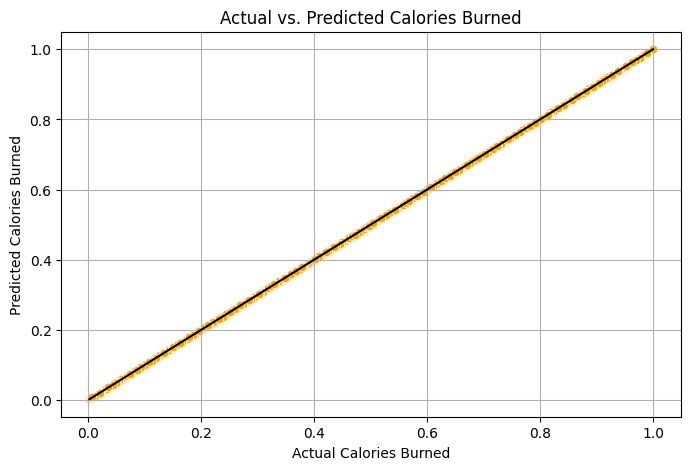

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color = 'orange')
sns.lineplot(x=y_test, y=y_test, color='black')
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned")
plt.grid(True)
plt.show()

# Applying Logistic Regression:

*To Classify Burns_Calories_Bin on the basis of Numeric Data.*

In [ ]:
P = df_minmax_scaled
q = df['Burns_Calories_Bin']

In [ ]:
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=500)

In [ ]:
model.fit(P_train, q_train)

LogisticRegression(max_iter=500)

In [ ]:
q_pred = model.predict(P_test)

In [ ]:
accuracy = accuracy_score(q_test, q_pred)
print("Accuracy of the Logistic Regression model on Lifestyle DataSet:", accuracy)

Accuracy of the Logistic Regression model on Lifestyle DataSet: 0.95


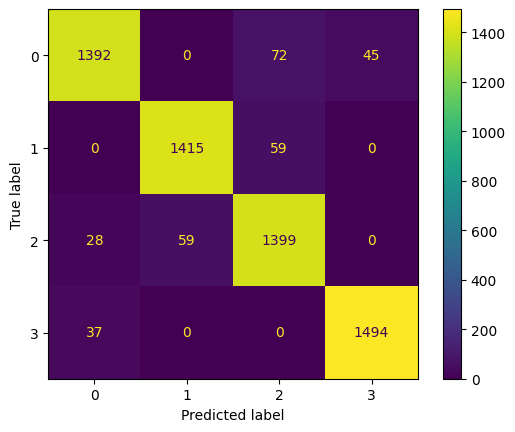

In [ ]:
cm = confusion_matrix(q_test, q_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()